In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/CodexploreRepo/data-science/main/Code/P01_Pre_Processing/Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Data Imputation (Missing Data Replacement)
Trích xuất dữ liệu (Thiếu dữ liệu thay thế)
Bộ dữ liệu thường thiếu giá trị và điều này có thể gây ra sự cố cho các thuật toán máy học. Việc xác định và thay thế các giá trị bị thiếu trong mỗi cột của tập dữ liệu trước khi thực hiện lập mô hình dự đoán được coi là một phương pháp hay. Phương pháp thay thế dữ liệu bị thiếu này được gọi là thay thế dữ liệu.

In [5]:
df.info() # Coi số dữ liệu bị thiếu (NULL) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [18]:
for col in df.columns:
  missing_data=df[col].isna().sum() # Tính tổng số dữ liệu còn thiếu 
  missing_percent=missing_data/len(df)*100 # Tính phần trăm dữ liệu còn thiếu 
  print(f"Column: {col}: has {missing_percent}% missing data")

Column: Country: has 0.0% missing data
Column: Age: has 10.0% missing data
Column: Salary: has 10.0% missing data
Column: Purchased: has 0.0% missing data


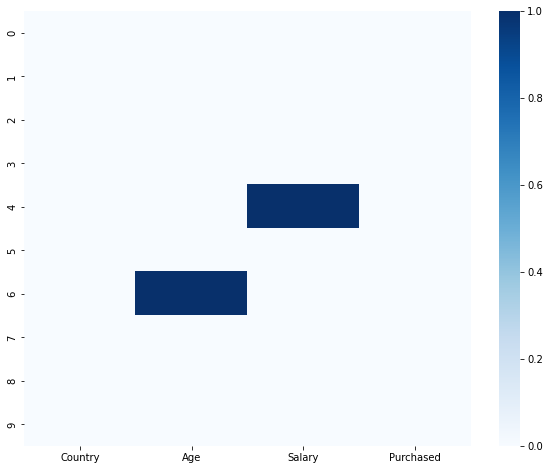

In [21]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(df.isna(),cmap="Blues")

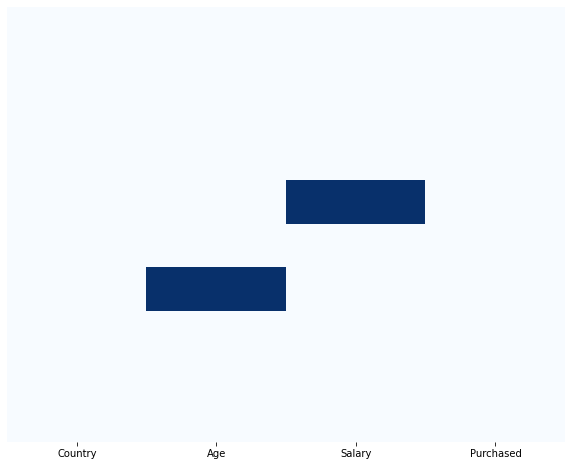

In [22]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(df.isna(),cmap="Blues",cbar=False,yticklabels=False)
# Như ta đã thấy chỉ có cột Age và cột Salary là có chứa missing datadata

In [23]:
df
# ta sẽ có x :Dữ liệu đầu vào (Country,Age,salary) đưa vào mô hình máy học để train, tạo ra y (Purchased)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [65]:
X=df.iloc[:,:-1] # Lấy tất cả các hàng và không lấy cột cuối 
X

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [71]:
# Chuyển sang dạng numpy array 
X=df.iloc[:,:-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [72]:
y=df.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [73]:
from sklearn.impute import SimpleImputer
#Tạo một lớp thay thế giá trị thiếu bằng  SimpleImputer: np.nan là giá trị trống trong tập dữ liệu
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Thay thế giá trị nan thành giá trị trung bình của các giá trị còn lại 

#Thay thế giá trị còn thiếu từ số Col 1 'Age', Col 2 'Salary'
#fit trên tập dữ liệu để tính toán thống kê cho từng cột
imputer.fit(X[:, 1:3]) 

X[:, 1:3] = imputer.transform(X[:, 1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [75]:
#Encode Categorical Data (Mã hóa phân loại dữ liệu)
#Mã hóa Biến độc lập (x) --> dự đoán y
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#transformers: chỉ định loại biến đổi nào và cột nào
#Tuple (chuyển đổi mã hóa 'bộ mã hóa', ví dụ của Lớp OneHotEncoder, [col để chuyển đổi])
#remainder ="passthrough"> để giữ các cột không bị biến đổi. Nếu không, các cột còn lại sẽ không được đưa vào
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])] , remainder="passthrough" )
#fit và biến đổi với đầu vào = x
#np.array: cần chuyển đổi đầu ra của fit_transform() từ ma trận sang np.array
X = np.array(ct.fit_transform(X))
X #(France , Ger ,Spain; Age,Salary)
#France 0 1 0
#Spain 1 0 0
#Germany 1 0 1

array([[0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [36]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#output của fit_transform của Bộ mã hóa Nhãn đã là một Mảng Numpy
y = le.fit_transform(y)
y
# No :0 , Yes :1

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Splitting the dataset (X = data, y = output) into the Training set and Test set
----
Chia bộ dữ liệu (x = data, y = output) vào tập huấn luyện và bộ kiểm tra

In [76]:
from sklearn.model_selection import train_test_split
np.random.seed(42) ## Để nhiều người thử cùng 1 kết quả 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # Ta có 10 dòng , ta dùng 8 dòng ngẫu nhiên để train modol và 2 dòng còn lại để test model
# 80% dữ liệu x_train, 20% của x_test,y_train: nhãn tương ứng vs x_train, y_test: nhãn tương ứng với x_test


In [77]:
X_train

array([[0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0],
       [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [78]:
X

array([[0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [44]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [79]:
X_test
# Trích ra từ ID 8 và 11

array([[1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [46]:
y_test 
# Kết quả máy học của ID 8 và 1 , 8 :NO , 1:YES

array([0, 1])

In [43]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [80]:
## Ta thấy dữ liệu tuổi tác và mức lương khá chênh lệch nhau , nó sẽ tạo ra sự áp đảo của cột salary , ta sẽ đưa 2 dữ liệu chaun63 hóa đó về 1 cái thang 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
#chỉ sử dụng Biến đổi để sử dụng bộ chia tỷ lệ CÙNG làm Tập huấn luyện
X_test[:,3:] = sc.transform(X_test[:,3:])

In [81]:
X_train

array([[0.0, 1.0, 0.0, -0.5773502691896258, -0.7529426005471072,
        -0.6260377781240918],
       [0.0, 1.0, 0.0, -0.5773502691896258, 1.008453807952985,
        1.0130429500553495],
       [0.0, 1.0, 0.0, -0.5773502691896258, 1.7912966561752484,
        1.8325833141450703],
       [1.0, 0.0, 1.0, -0.5773502691896258, -1.7314961608249362,
        -1.0943465576039322],
       [0.0, 1.0, 0.0, -0.5773502691896258, -0.3615211764359756,
        0.42765697570554906],
       [1.0, 0.0, 1.0, -0.5773502691896258, 0.22561095973072184,
        0.05040823668012247],
       [1.0, 0.0, 0.0, 1.7320508075688774, -0.16581046438040975,
        -0.27480619351421154],
       [1.0, 0.0, 0.0, 1.7320508075688774, -0.013591021670525094,
        -1.3285009473438525]], dtype=object)

In [82]:
X_test[:,3:]=sc.transform(X_test[:,3:])
X_test

array([[1.0, 0.0, 1.0, -1.9106836025229594, -7.175636212782505,
        -7.416245698589758],
       [1.0, 0.0, 0.0, 3.4226497308103747, -8.056597917488327,
        -7.416725446024309]], dtype=object)